<a href="https://colab.research.google.com/github/Pedro-V/api-youtube-babysteps/blob/main/YoutubeAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Consumindo uma API do Youtube sobre dados
Notebook super bobo, mas eu nunca tive muito contato com APIs. Fui entender o conceito recentemente e queria algo 'prático' pra entender mais ou menos como funciona. A API do Youtube nesse caso é a Youtube Data API v3 e talvez seja necessário incluí-la em seu projeto no Google Cloud Platform.

Achei um vídeo legal do canal '**Programação Dinâmica**' (super recomendo) e resolvi replicar numa playlist de videos de um canal de aquário, **Foo the Flowerhorn** (também super recomendo!).


In [ ]:
!pip install --upgrade google-api-python-client;

In [105]:
from googleapiclient.discovery import build

In [106]:
#Os passos para obter uma key para a API podem ser vistos nesse vídeo do canal Programação Dinâmica: https://www.youtube.com/watch?v=olDCJ1w3FLM
youtubeApiKey = "XXXXXXXXXXXX"

youtube = build('youtube','v3', developerKey=youtubeApiKey)

In [107]:
#extraindo dados de uma playlist
playlistId = 'PL2155euLw9DN6EU2zBTlDj8-q572aZv7w' #Foo the Flowerhorn playlist
playlistName = 'Flowerhorn'
nextPage_token = None

In [108]:
playlist_videos = []

# Acessa os vídeos da playlist de Flowerhorn, retorna uma lista de JSONs
res = youtube.playlistItems().list(part='snippet', playlistId = playlistId, maxResults=50).execute()
playlist_videos =res ['items']

#Extrai os ids dos vídeos da playlist
video_ids = list(map(lambda x: x['snippet']['resourceId']['videoId'], playlist_videos))
video_ids;

In [ ]:
#Criar uma nova lista JSON, com estatísticas importantes dos vídeos da playlist.
stats = []

for video_id in video_ids:

  lista_videos = youtube.videos().list(part='statistics', id=video_id).execute()
  stats += lista_videos['items']

stats

In [110]:
video_titles = list(map(lambda x: x['snippet']['title'], playlist_videos))
thumb_urls = list(map(lambda x: x['snippet']['thumbnails']['high']['url'], playlist_videos))
video_titles = list(map(lambda x: x['snippet']['title'], playlist_videos))
published_date = list(map(lambda x: x['snippet']['publishedAt'], playlist_videos))
video_description = list(map(lambda x: x['snippet']['description'], playlist_videos))

In [111]:
views = list(map(lambda x: int(x['statistics']['viewCount']), stats))
liked = list(map(lambda x: int(x['statistics']['likeCount']), stats))
#Antes era possível acessar as stats sobre dislikes. Mas o Youtube retirou a visibilidade dessa info e a API refletiu tal mudança.
comments = list(map(lambda x: int(x['statistics']['commentCount']), stats))
liked_view_ratio = list(map(lambda x: 100*(x[0]/x[1]), zip(liked, views)))  #fiz esse por curiosidade, mas o ratio é mtt baixo pra quase todos os vídeos =(

In [112]:
from datetime import datetime

extraction_date = [str(datetime.now())]*len(video_ids)

**Finalmente, colocando os dados extraídos da playlist num dataframe usando Pandas**


In [113]:
import pandas as pd
foo_playlist_df = pd.DataFrame({
    'title':video_titles,
    'video_id':video_ids,
    'published_date':published_date,
    'extraction_date':extraction_date,
    'views':views,
    'likes':liked,
    'comments_count':comments,
    'liked_to_view_ratio':liked_view_ratio,
    'thumbnail':thumb_urls
})

foo_playlist_df.head()

,title,video_id,published_date,extraction_date,views,likes,comments_count,liked_to_view_ratio,thumbnail
0,"No Filter, No CO2, No Ferts Bowl - 6 Months Gr...",6G5LgVj1sKM,2017-09-04T03:54:41Z,2022-03-26 22:43:04.494538,2361172,33637,1832,1.424589,https://i.ytimg.com/vi/6G5LgVj1sKM/hqdefault.jpg
1,"No Filter, No CO2, No Ferts, Mini Planted Tank...",TYrqG3ORTGo,2017-09-04T03:55:01Z,2022-03-26 22:43:04.494538,896164,9996,929,1.115421,https://i.ytimg.com/vi/TYrqG3ORTGo/hqdefault.jpg
2,"Update - No Filter, No CO2, No Ferts, Mini Pla...",sWpYpM_7DVo,2017-09-04T03:55:31Z,2022-03-26 22:43:04.494538,533066,4400,349,0.825414,https://i.ytimg.com/vi/sWpYpM_7DVo/hqdefault.jpg
3,"Tutorial - No Filter, No CO2, No Ferts, Window...",fA4ghk0vDqM,2017-09-04T03:55:42Z,2022-03-26 22:43:04.494538,1241880,16081,546,1.294892,https://i.ytimg.com/vi/fA4ghk0vDqM/hqdefault.jpg
4,No Filter No CO2 No Ferts Bowl - EXPLAINED and...,NbOrGRhfdL0,2017-09-04T03:55:58Z,2022-03-26 22:43:04.494538,959387,26408,1307,2.752591,https://i.ytimg.com/vi/NbOrGRhfdL0/hqdefault.jpg


In [114]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as pgo

length = len(foo_playlist_df)
x = np.arange(length, dtype=float).reshape((length, 1))
y = x + (np.random.rand(length)*length).reshape((length,1))

x = foo_playlist_df.views.values
y = foo_playlist_df.likes.values
print(x)

[ 2361172   896164   533066  1241880   959387  3080371  2949141  1331276
   250954  1346469  1908942 14386850  2999444  7319558  1128346   728950
   675042  1153010   576528   515133  2049637   623114   497757  1539724
   557763   549397  2052791 12051830 25047369 38500459  7489290  1223076
  1820097   764770   564051  1585467]


In [115]:
x = x.reshape(length,1)
y = y.reshape(length,1)

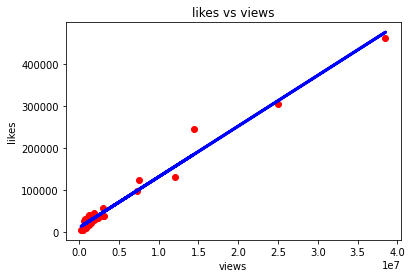

In [116]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.scatter(x, y, color='red')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.title('likes vs views')
plt.xlabel('views')
plt.ylabel('likes')
plt.show()

Eu também estava interessado em iniciar no Plotly, ou pelo menor ter uma ideia básica de como funcion a lib. Bom, aparentemente ainda tenho um bom caminho a percorrer já que eu não conseguir fazer nem uma linha de scatter no gráfico abaixo.

Mas que é bonito, é.

In [117]:
x_range = np.linspace(x.min(), x.max(), 100)
y_range = regr.predict(x_range.reshape(-1, 1))


fig = px.scatter(foo_playlist_df, x='views', y='likes', opacity=0.65)
fig.add_traces(pgo.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()

In [118]:
r_sq = regr.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9769295151469055
